In [2]:
import cv2

In [3]:
extraction_path=r"C:\Users\HARISH A K\Desktop\python\Deep_Learning\Deep_learning_projects\screen_time_and_boundingBox\extraction_frames2"

In [4]:
# Path to the video file
video_path = 'data2.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get the frames per second (fps) of the video
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Release the video capture object
cap.release()

print(f"The frames per second (fps) of the video is: {fps}")

The frames per second (fps) of the video is: 29


In [27]:

video_path = 'data2.mp4'

cap = cv2.VideoCapture(video_path)
frame_interval=8

while True:
    
    ret, img = cap.read()
    
    if not ret:
        print("All frames extracted")
        break
        
    if frames_count%frame_interval==0:
        
        filename = f"{extraction_path}\\frame{frames_count // frame_interval}.jpg"
        cv2.imwrite(filename, img)


# Release the video capture object
cap.release()

All frames extracted


# (i) Object Detection and Bounding Boxes

# (ii) Counting People

# (iii) Screen Time Calculation


In [5]:
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

In [6]:
extraction_path=r"C:\Users\HARISH A K\Desktop\python\Deep_Learning\Deep_learning_projects\screen_time_and_boundingBox\extraction_frames2"

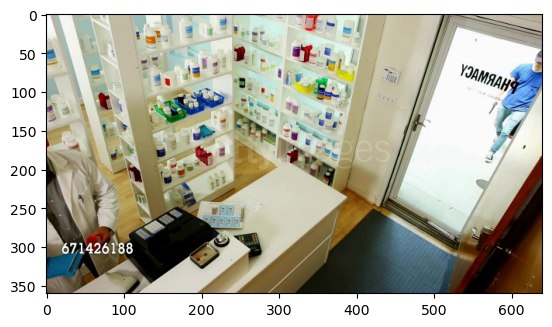

In [7]:
import matplotlib.pyplot as plt
img = plt.imread(r"C:\Users\HARISH A K\Desktop\python\Deep_Learning\Deep_learning_projects\screen_time_and_boundingBox\extraction_frames2\frame15.jpg")   # reading image using its name
plt.imshow(img)

# Human detection

In [22]:
import numpy as np
import cv2

# Initialize an empty dictionary to track detected persons and their trackers
detected_persons = {}
current_person_id = 0
max_detected_count = 0  # Variable to keep track of the maximum detected count

for i in range(1, 107):

    frame_path = extraction_path + "\\frame%d.jpg" % i
    image = cv2.imread(frame_path)
    height, width = image.shape[:2]

    # Preprocess the frames for YOLOv3
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), swapRB=True, crop=False)
    
    net.setInput(blob)

    # Get output
    outs = net.forward(net.getUnconnectedOutLayersNames())
    
    # Thresholds
    conf_threshold = 0.5
    nms_threshold = 0

    # Define lists for detection
    class_ids = []
    confidences = []
    boxes = []

    # Detection process
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > conf_threshold and class_id == 0:  # class_id = 0 means people
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([x, y, w, h])

    # Apply Non-Maximum Suppression (NMS)
    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

    # Update the maximum detected count
    max_detected_count = max(max_detected_count, len(indices))

    # Draw bounding boxes without tracking
    for index in indices:
        x, y, w, h = boxes[index]
        color = (0, 255, 0)  # Green color
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 3)

    # Display the frame with bounding boxes
    resized_image = cv2.resize(image, (800, 600))
    cv2.imshow("Bounding box", resized_image)

    key = cv2.waitKey(1)

    if key == ord('q'):
        break

cv2.destroyAllWindows()


Maximum unique persons detected at a time: 2


# Counting people

In [23]:
print("unique persons detected at a time:", max_detected_count)


unique persons detected at a time: 2


# Screen time for each person in the video

## Timestamp for each frame

In [27]:
# import cv2

# frame_no = 1
# extraction_path = r"C:\Users\HARISH A K\Desktop\python\Deep_Learning\Deep_learning_projects\screen_time_and_boundingBox\extraction_frames2"
# cap = cv2.VideoCapture(video_path)

# while cap.isOpened():
#     frame_exists, curr_frame = cap.read()
#     if frame_exists:
#         timestamp_ms = cap.get(cv2.CAP_PROP_POS_MSEC)  # Timestamp in milliseconds
#         timestamp_sec = timestamp_ms / 1000  # Convert to seconds
#         print(f"For frame {frame_no}, timestamp is: {timestamp_sec:.2f} seconds")
#          # .3f 3 number of fecimal places to print
#     else:
#         break
#     frame_no += 1
# cap.release()

## Object tracking 